## Project Milestone 2 findings (scroll down for PM3 findings)

### Imports

In [ ]:
import sys
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import math
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import importlib
from empath import Empath

#add path to script
sys.path.append(os.path.abspath("../src/data/"))
sys.path.append(os.path.abspath("src/model/"))
sys.path.append(os.path.abspath("../src/plots_helper/"))
sys.path.append(os.path.abspath("src/utils/"))

from src.model.ARDL_model import *
from src.utils.helper import *
from src.plot_helper.ARDL_plot_helper import *
#import the DataLoader class
from src.data.data_loading import DataLoader


%matplotlib inline


<h1 style="color: blue;">6. Impact of violent movies on real life violence : autoregressive distributed lag model
 </h1> <a id="ardl"></a>

### Now we start implementing the auto-regressive distributed lag (ARDL) model.

In [6]:
DATA_PATH_ARDL = "data/CLEAN"

### Model 1: Naive approach 

In the first approach, we do not normalise and take the following values: 

* box office revenues: sum of box office revenues of violent movies released in week i
* violent movie release count: count of violent movies released in week i
* real violence: number of all violent criminal offenses registered in week i

#### All states merged with time-fixed effects:

In [7]:
# Load the final box office revenue data into a dataframe (not normalised)
df_box_offices = pd.read_csv(DATA_PATH_ARDL+"/Violent_Movies_final.tsv", sep="\t")

# Model 1: load the simple violent offenses count into dataframe -> here: for all states merged
df_real_violence = pd.read_csv(DATA_PATH_ARDL+"/FBI_91_12/00_All_States_Merged/violence_scores_merged.csv", sep=",")

In [18]:
# cut the real_violence dataframe to only include years from 2008 onwards -> to ensure we have complete data for all states
df_real_violence_cut = df_real_violence[df_real_violence['Year'] >= 2008]

In [19]:
# create ARDL model with optimal lags and include time-fixed effects
model_1_with_TFE_all_states = ARDL_model_func(df_box_offices, df_real_violence_cut, time_fixed_effects=True)

In [20]:
# extract the fitted model summary data, return the results dataframe and also store as HTML table (inside function) for embedding into website
results_1_with_TFE_all_states = extract_model_results(model_1_with_TFE_all_states, "Model 1 with TFE all states", "data/CLEAN/")

In [27]:
# plot the summary of the fitted model (if needed)
#model_1_with_TFE_all_states.summary()

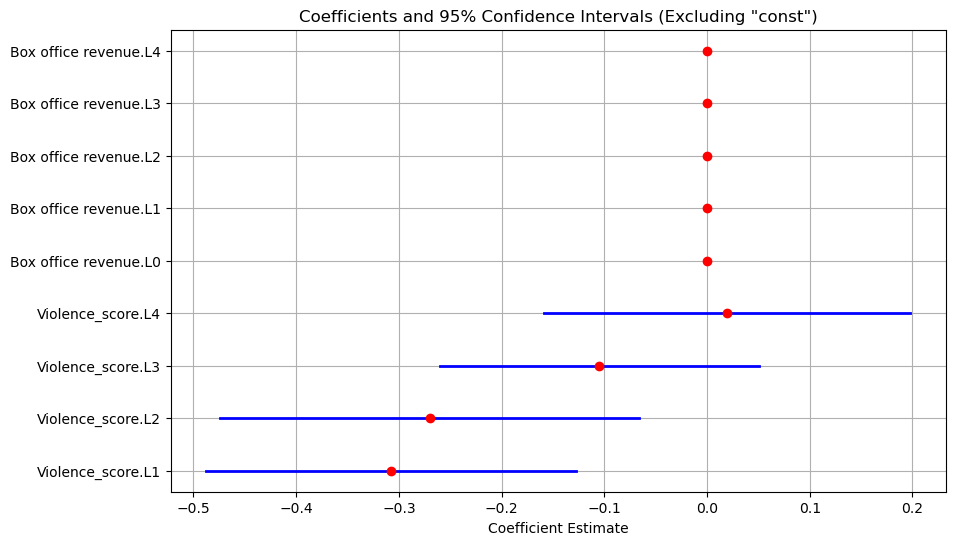

In [25]:
# Plot the 95% confidence intervals for all important coefficients
plot_coefficients_with_confidence_intervals(results_1_with_TFE_all_states)

#### All states merged without time-fixed effects:

In [29]:
# create ARDL model with optimal lags and exclude time-fixed effects
model_1_without_TFE_all_states = ARDL_model_func(df_box_offices, df_real_violence_cut, time_fixed_effects=False)

In [31]:
# extract the fitted model summary data, return the results dataframe and also store as HTML table (inside function) for embedding into website
results_1_without_TFE_all_states = extract_model_results(model_1_without_TFE_all_states, "Model 1 without TFE all states", "data/CLEAN/")

In [34]:
# plot the summary of the fitted model (if needed)
#model_1_without_TFE_all_states.summary()

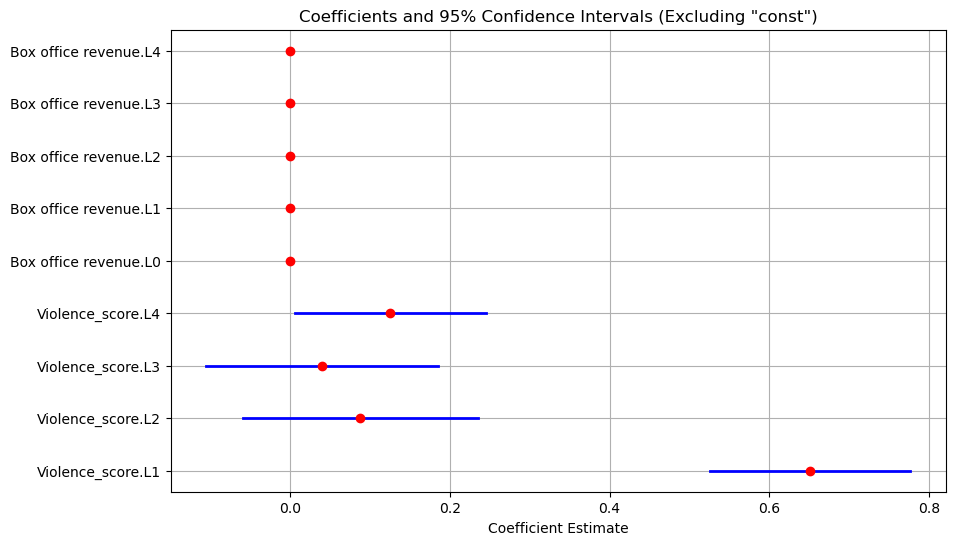

In [ ]:
# Plot the 95% confidence intervals for all important coefficients
plot_coefficients_with_confidence_intervals(results_1_without_TFE_all_states)

#### Single state (example here: North Dakota) with time-fixed effects:

In [47]:
# retrieve info about the years for each state for which we have consecutive data
consecutive_years_per_state = pd.read_csv(DATA_PATH_ARDL+"/FBI_91_12/02_Consecutive_Years_States/Consecutive_years_states.tsv", sep="\t")

In [46]:
# fit an optimal ARDL model for each state separately, based on the corresponding consecutive years of data, with time-fixed effects
DIRECTORY_PATH = DATA_PATH_ARDL + "/FBI_91_12/01_States_Separately"
fitted_ARDL_models = ARDL_states_separate(DIRECTORY_PATH, df_box_offices, consecutive_years_per_state, ARDL_model_func, time_fixed_effects=True)

In [48]:
# choose one state of interest -> example here: North Dakota (feel free to choose another one)
model_1_with_TFE_single_state = fitted_ARDL_models["ARDL_NorthDakota"]

In [49]:
# extract the fitted model summary data, return the results dataframe and also store as HTML table (inside function) for embedding into website
results_1_with_TFE_single_state = extract_model_results(model_1_with_TFE_single_state, "Model 1 with TFE single state", "data/CLEAN/")

In [50]:
# plot the summary of the fitted model (if needed)
#model_1_with_TFE_single_state.summary()

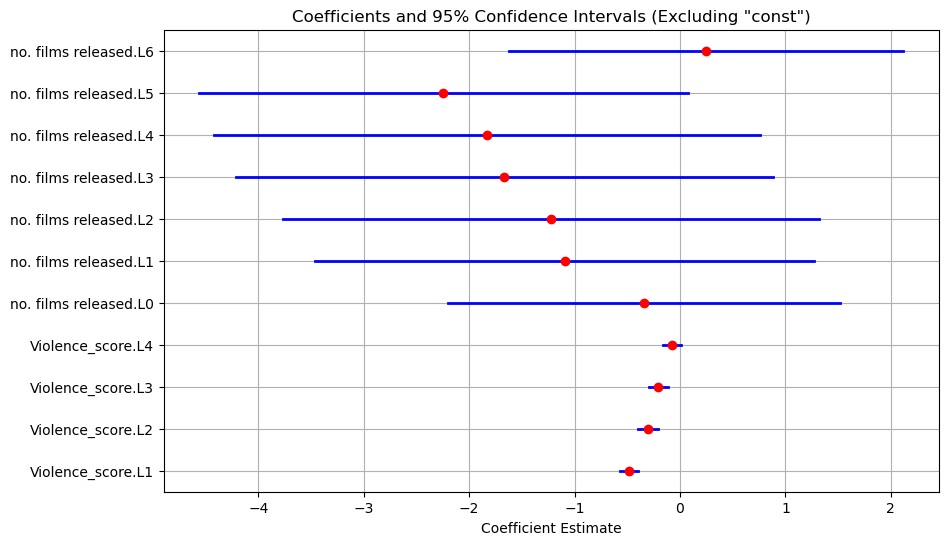

In [ ]:
# Plot the 95% confidence intervals for all important coefficients
plot_coefficients_with_confidence_intervals(results_1_with_TFE_single_state)

#### Single state (example here: North Dakota) without time-fixed effects:

In [52]:
# fit an optimal ARDL model for each state separately, based on the corresponding consecutive years of data, without time-fixed effects
fitted_ARDL_models = ARDL_states_separate(DIRECTORY_PATH, df_box_offices, consecutive_years_per_state, ARDL_model_func, time_fixed_effects=False)

In [53]:
# choose one state of interest -> example here: North Dakota (feel free to choose another one)
model_1_without_TFE_single_state = fitted_ARDL_models["ARDL_NorthDakota"]

In [54]:
# extract the fitted model summary data, return the results dataframe and also store as HTML table (inside function) for embedding into website
results_1_without_TFE_single_state = extract_model_results(model_1_without_TFE_single_state, "Model 1 without TFE single state", "data/CLEAN/")

In [56]:
# plot the summary of the fitted model (if needed)
#model_1_without_TFE_single_state.summary()

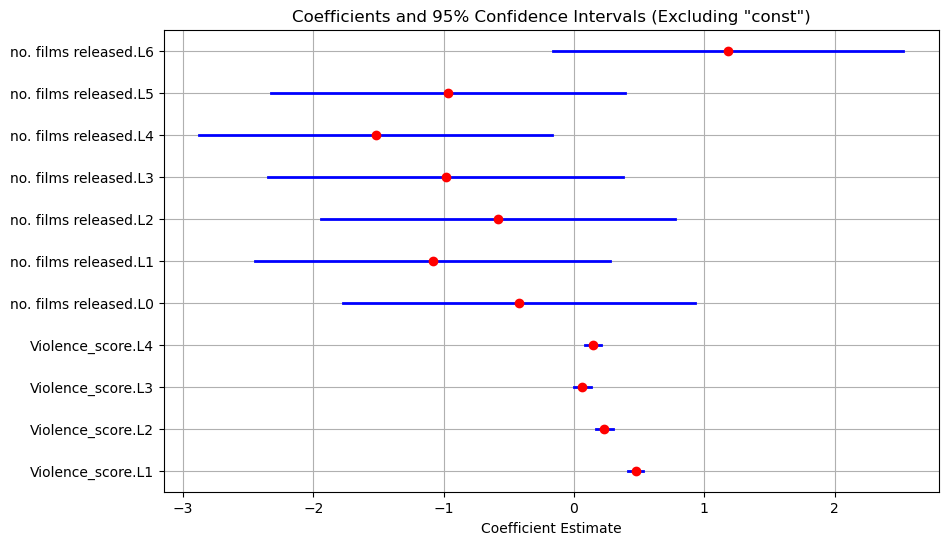

In [ ]:
# Plot the 95% confidence intervals for all important coefficients
plot_coefficients_with_confidence_intervals(results_1_without_TFE_single_state)

### Model 2: Violence Offense Ratios

In the second approach, we normalize the real-world violence but keep the box office revenues as they are: 

* box office revenues: sum of box office revenues of violent movies released in week i
* violent movie release count: count of violent movies released in week i
* real violence: number of all criminal offenses registered in week i divided by number of all criminal offenses registered in that year

*Note: Due to the analogous proceeding for all cases (all states/single state, with time-fixed effects/without time-fixed effects) we only show here the results for the example single state North Dakota, since we then can use a longer time period as for all states merged. North Dakota is particularly interesting since we have nearly complete data for 1991 to 2012.*

#### Single state (example here: North Dakota) with time-fixed effects:

In [8]:
# load violence ratio data for North Dakota
df_real_violence_ratio = pd.read_csv(DATA_PATH_ARDL+"/FBI_91_12/03_Violence_Ratio/violence_ratio_northdakota_1991_2012.csv", sep=",")

In [9]:
# create ARDL model with optimal lags and include time-fixed effects
model_2_with_TFE_single_state = ARDL_model_func(df_box_offices, df_real_violence_ratio, time_fixed_effects=True)

In [10]:
# extract the fitted model summary data, return the results dataframe and also store as HTML table (inside function) for embedding into website
results_2_with_TFE_single_state = extract_model_results(model_2_with_TFE_single_state, "Model 2 with TFE single state", "data/CLEAN/")

In [12]:
# plot the summary of the fitted model (if needed)
#model_2_with_TFE_single_state.summary()

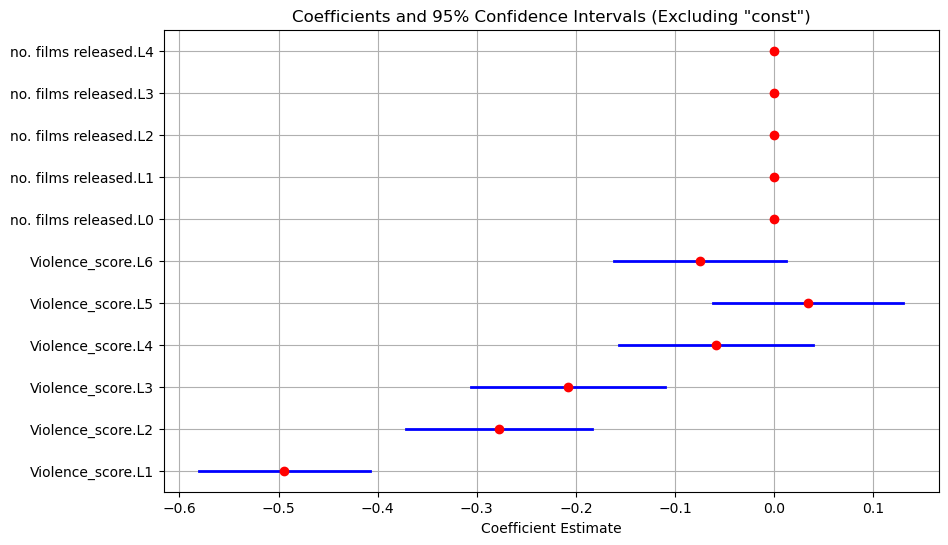

In [ ]:
# Plot the 95% confidence intervals for all important coefficients
plot_coefficients_with_confidence_intervals(results_2_with_TFE_single_state)

#### Single state (example here: North Dakota) without time-fixed effects:

In [14]:
# create ARDL model with optimal lags and exclude time-fixed effects
model_2_without_TFE_single_state = ARDL_model_func(df_box_offices, df_real_violence_ratio, time_fixed_effects=False)

In [15]:
# extract the fitted model summary data, return the results dataframe and also store as HTML table (inside function) for embedding into website
results_2_without_TFE_single_state = extract_model_results(model_2_without_TFE_single_state, "Model 2 without TFE single state", "data/CLEAN/")

In [17]:
# plot the summary of the fitted model (if needed)
#model_2_without_TFE_single_state.summary()

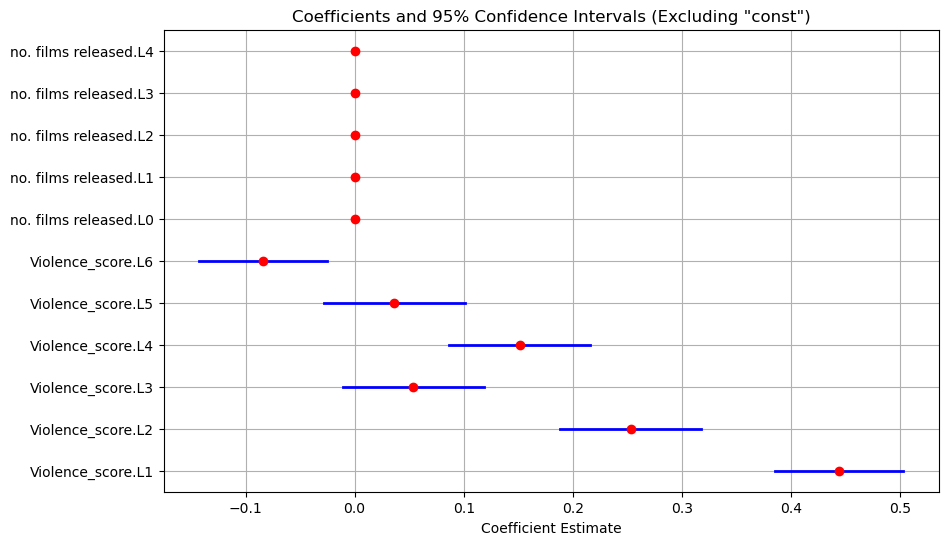

In [ ]:
# Plot the 95% confidence intervals for all important coefficients
plot_coefficients_with_confidence_intervals(results_2_without_TFE_single_state)

### Model 3: Normalized box office revenues

In the third approach, we normalize the box office revenues for violent films but keep the violence offense counts as they are: 

* box office revenues: fill NaN values of box office revenues with median, divide all values by the median, then sum up these values for the violent movies in week i
* violent movie release count: count of violent movies released in week i
* real violence: number of all violent criminal offenses registered in week i

*Note: Due to the analogous proceeding for all cases (all states/single state, with time-fixed effects/without time-fixed effects) we only show here the results for the example single state North Dakota, since we then can use a longer time period as for all states merged. North Dakota is particularly interesting since we have nearly complete data for 1991 to 2012.*

#### Single state (example here: North Dakota) with time-fixed effects:

In [12]:
# load the normalised box office revenues
df_box_offices_norm = pd.read_csv(DATA_PATH_ARDL+"/movie_violence_metric.csv", sep=",")
df_box_offices_norm.columns.values[2] = "Box office revenue"

In [24]:
# load the violent offenses counts for one single state (here: NorthDakota)
df_real_violence_counts = pd.read_csv(DATA_PATH_ARDL+"/FBI_91_12/01_States_Separately/NorthDakota_violence.csv", sep=",")

In [ ]:
# create ARDL model with optimal lags and include time-fixed effects
model_3_with_TFE_single_state = ARDL_model_func(df_box_offices_norm, df_real_violence_counts, time_fixed_effects=True)

In [30]:
# extract the fitted model summary data, return the results dataframe and also store as HTML table (inside function) for embedding into website
results_3_with_TFE_single_state = extract_model_results(model_3_with_TFE_single_state, "Model 3 with TFE single state", "data/CLEAN/")

In [31]:
# plot the summary of the fitted model (if needed)
#model_3_with_TFE_single_state.summary()

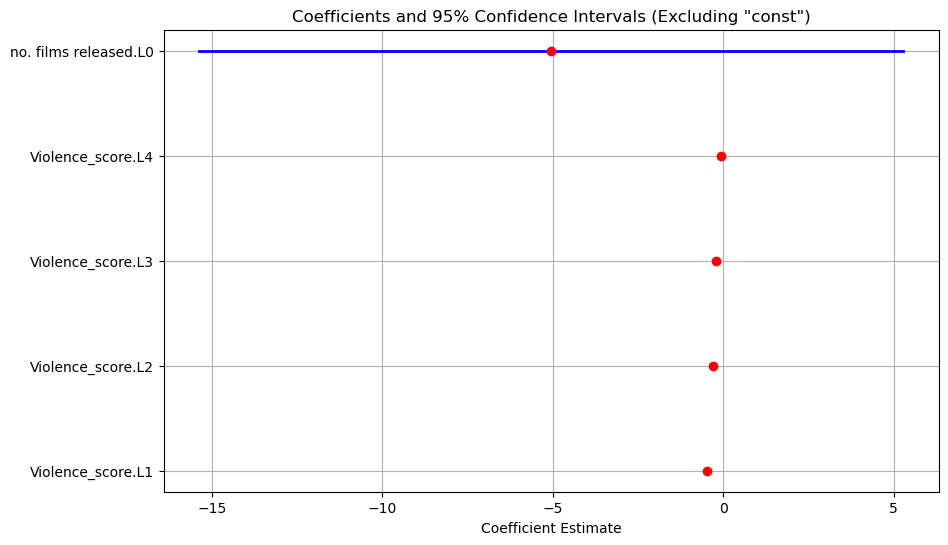

In [32]:
# Plot the 95% confidence intervals for all important coefficients
plot_coefficients_with_confidence_intervals(results_3_with_TFE_single_state)

#### Single state (example here: North Dakota) without time-fixed effects:

In [33]:
# create ARDL model with optimal lags and include time-fixed effects
model_3_without_TFE_single_state = ARDL_model_func(df_box_offices_norm, df_real_violence_counts, time_fixed_effects=False)

In [34]:
# extract the fitted model summary data, return the results dataframe and also store as HTML table (inside function) for embedding into website
results_3_without_TFE_single_state = extract_model_results(model_3_without_TFE_single_state, "Model 3 without TFE single state", "data/CLEAN/")

In [35]:
# plot the summary of the fitted model (if needed)
#model_3_without_TFE_single_state.summary()

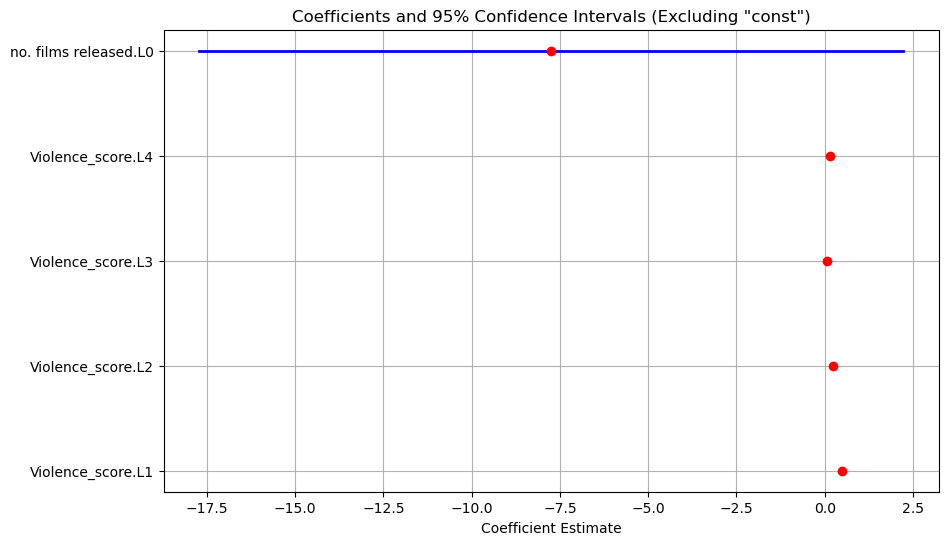

In [36]:
# Plot the 95% confidence intervals for all important coefficients
plot_coefficients_with_confidence_intervals(results_3_without_TFE_single_state)

### Model 4: Z-score for violence offenses

In the fourth approach, we compute the z-score for the violence offenses but keep the box office revenues as they are.

* box office revenues: sum of box office revenues of violent movies in week i
* violent movie release count: count of violent movies released in week i
* real violence: z-score of the offense counts for each category of offense ('Assault Offenses', 'Robbery', 'Sex Offenses', 'Kidnapping/Abduction', 'Arson', 'Homicide Offenses') using a rolling window of the same size as the maximum auto-regressive lag of the ARDL model for the normalization; reference point is the week i

*Note: Due to the analogous proceeding for all cases (all states/single state, with time-fixed effects/without time-fixed effects) we only show here the results for the example single state North Dakota, since we then can use a longer time period as for all states merged. North Dakota is particularly interesting since we have nearly complete data for 1991 to 2012.*

#### Single state (example here: North Dakota) with time-fixed effects:

In [69]:
# load the z-score values for one single state (here: NorthDakota)
df_real_violence_zscores = pd.read_csv(DATA_PATH_ARDL+"/FBI_91_12/04_Violence_z/Violence_z_northdakota_1991_2012.csv", sep=",")

In [58]:
# create ARDL model with optimal lags and include time-fixed effects
model_4_with_TFE_single_state = ARDL_model_func(df_box_offices, df_real_violence_zscores, time_fixed_effects=True)

In [59]:
# extract the fitted model summary data, return the results dataframe and also store as HTML table (inside function) for embedding into website
results_4_with_TFE_single_state = extract_model_results(model_4_with_TFE_single_state, "Model 4 with TFE single state", "data/CLEAN/")

In [63]:
# plot the summary of the fitted model (if needed)
#model_4_with_TFE_single_state.summary()

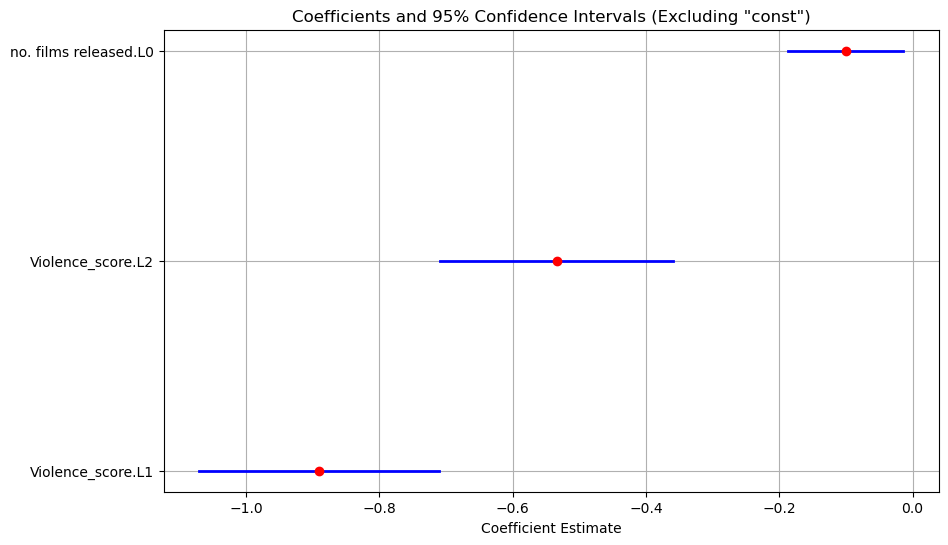

In [62]:
# Plot the 95% confidence intervals for all important coefficients
plot_coefficients_with_confidence_intervals(results_4_with_TFE_single_state)

#### Single state (example here: North Dakota) without time-fixed effects:

In [65]:
# create ARDL model with optimal lags and include time-fixed effects
model_4_without_TFE_single_state = ARDL_model_func(df_box_offices, df_real_violence_zscores, time_fixed_effects=False)

In [66]:
# extract the fitted model summary data, return the results dataframe and also store as HTML table (inside function) for embedding into website
results_4_without_TFE_single_state = extract_model_results(model_4_without_TFE_single_state, "Model 4 without TFE single state", "data/CLEAN/")

In [67]:
# plot the summary of the fitted model (if needed)
#model_4_without_TFE_single_state.summary()

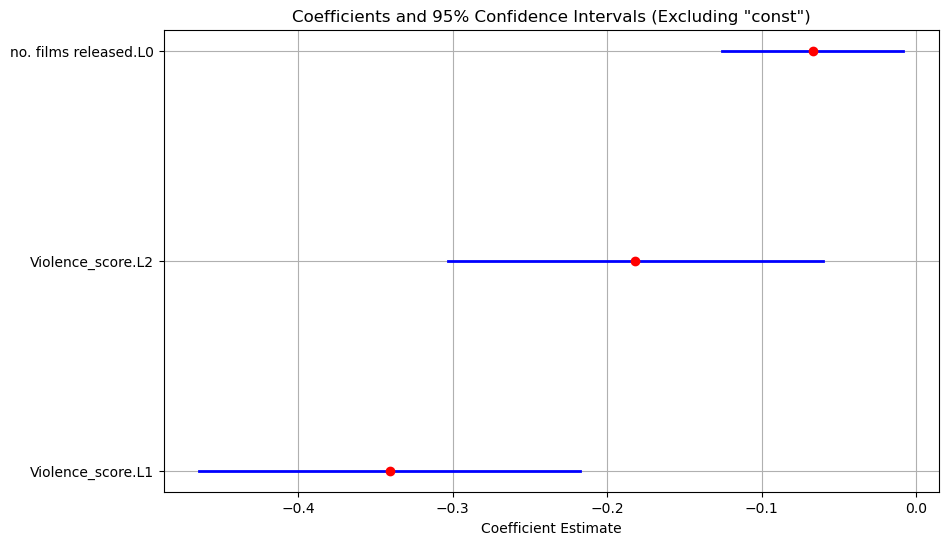

In [68]:
# Plot the 95% confidence intervals for all important coefficients
plot_coefficients_with_confidence_intervals(results_4_without_TFE_single_state)

### Model 5 (Final Model): Z-scores for violence offenses + normalized box office revenues

In the final approach, we compute the z-score for the violence offenses and normalize the box office revenues as in approach 3.

* box office revenues: fill NaN values of box office revenues with median, divide all values by the median, then sum up these values for the violent movies in week i
* violent movie release count: count of violent movies released in week i
* real violence: z-score of the offense counts for each category of offense ('Assault Offenses', 'Robbery', 'Sex Offenses', 'Kidnapping/Abduction', 'Arson', 'Homicide Offenses') using a rolling window of the same size as the maximum auto-regressive lag of the ARDL model for the normalization; reference point is the week i

#### Single state (example here: North Dakota) with time-fixed effects:

In [70]:
# create ARDL model with optimal lags and include time-fixed effects
model_5_with_TFE_single_state = ARDL_model_func(df_box_offices_norm, df_real_violence_zscores, time_fixed_effects=True)

In [71]:
# extract the fitted model summary data, return the results dataframe and also store as HTML table (inside function) for embedding into website
results_5_with_TFE_single_state = extract_model_results(model_5_with_TFE_single_state, "Model 5 with TFE single state", "data/CLEAN/")

In [72]:
# plot the summary of the fitted model (if needed)
#model_5_with_TFE_single_state.summary()

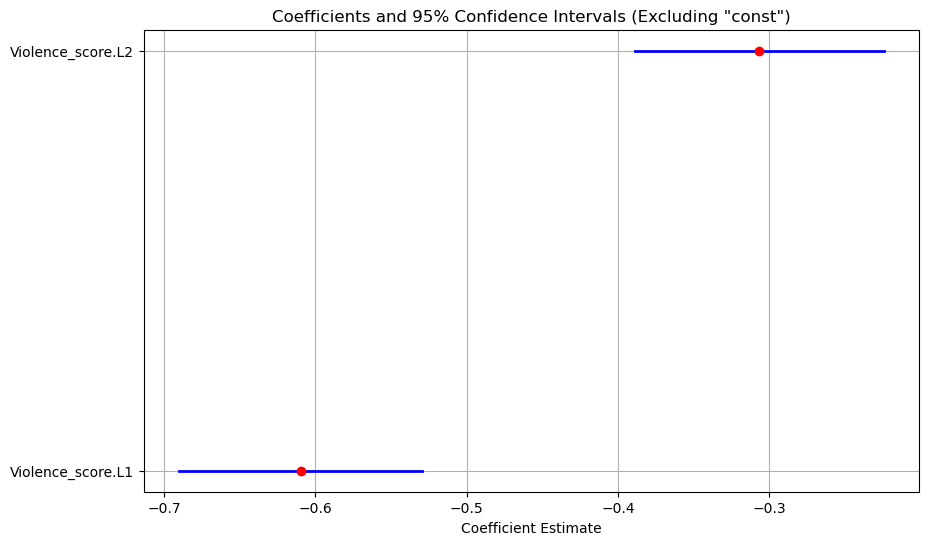

In [73]:
# Plot the 95% confidence intervals for all important coefficients
plot_coefficients_with_confidence_intervals(results_5_with_TFE_single_state)

#### Single state (example here: North Dakota) without time-fixed effects:

In [74]:
# create ARDL model with optimal lags and include time-fixed effects
model_5_without_TFE_single_state = ARDL_model_func(df_box_offices, df_real_violence_zscores, time_fixed_effects=False)

In [75]:
# extract the fitted model summary data, return the results dataframe and also store as HTML table (inside function) for embedding into website
results_5_without_TFE_single_state = extract_model_results(model_5_without_TFE_single_state, "Model 5 without TFE single state", "data/CLEAN/")

In [76]:
# plot the summary of the fitted model (if needed)
#model_5_without_TFE_single_state.summary()

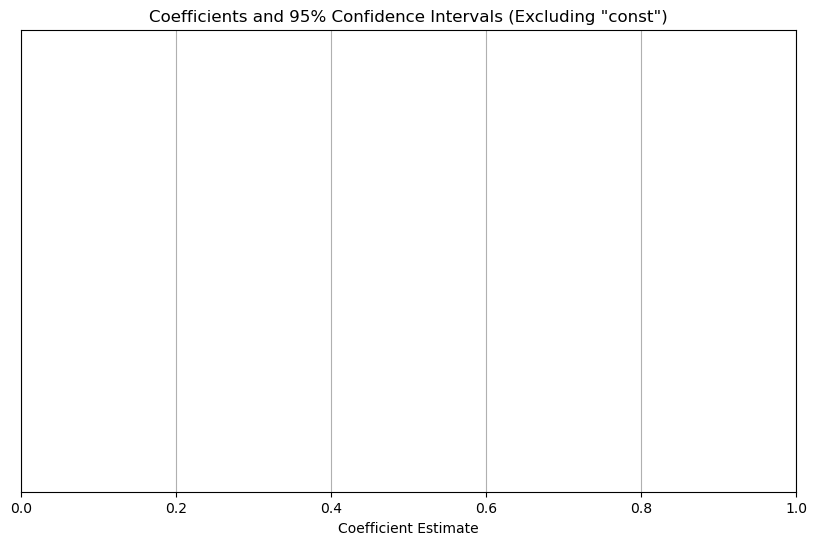

In [77]:
# Plot the 95% confidence intervals for all important coefficients
plot_coefficients_with_confidence_intervals(results_5_without_TFE_single_state)

#### All states merged with time-fixed effects:

In [8]:
# load the merged z-score for all states for real violence
df_real_violence_zscores_merged = pd.read_csv(DATA_PATH_ARDL+"/FBI_91_12/04_Violence_z/Violence_z_all_states_merged.csv", sep=",")

In [10]:
# cut the real_violence dataframe to only include years from 2008 onwards -> to ensure we have complete data for all states
df_real_violence_zscores_cut = df_real_violence_zscores_merged[df_real_violence_zscores_merged['Year'] >= 2008]

In [13]:
# create ARDL model with optimal lags and include time-fixed effects
model_5_with_TFE_all_states = ARDL_model_func(df_box_offices_norm, df_real_violence_zscores_cut, time_fixed_effects=True)

In [14]:
# extract the fitted model summary data, return the results dataframe and also store as HTML table (inside function) for embedding into website
results_5_with_TFE_all_states = extract_model_results(model_5_with_TFE_all_states, "Model 5 with TFE all states", "data/CLEAN/")

In [15]:
# plot the summary of the fitted model (if needed)
#model_5_with_TFE_all_states.summary()

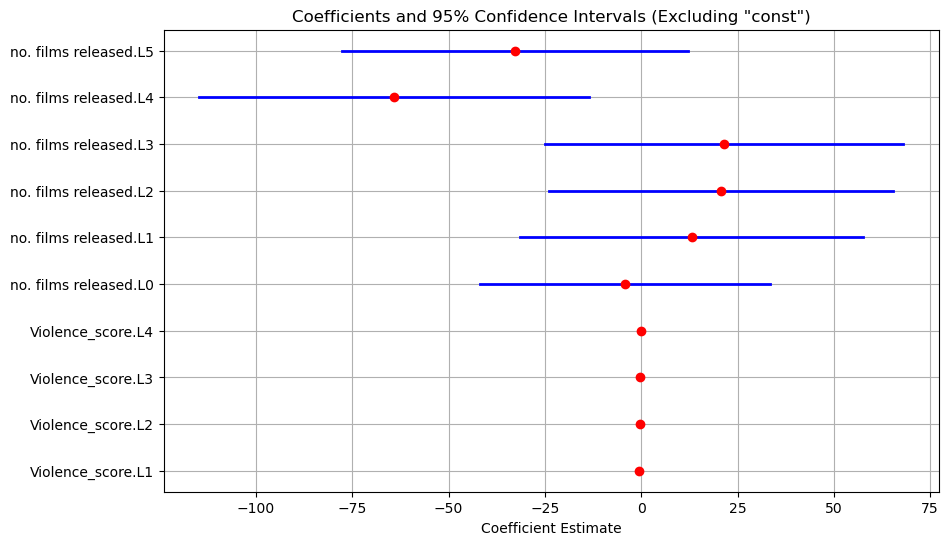

In [16]:
# Plot the 95% confidence intervals for all important coefficients
plot_coefficients_with_confidence_intervals(results_5_with_TFE_all_states)

#### All states merged without time-fixed effects:

In [17]:
# create ARDL model with optimal lags and exclude time-fixed effects
model_5_without_TFE_all_states = ARDL_model_func(df_box_offices_norm, df_real_violence_zscores_cut, time_fixed_effects=False)

In [18]:
# extract the fitted model summary data, return the results dataframe and also store as HTML table (inside function) for embedding into website
results_5_without_TFE_all_states = extract_model_results(model_5_without_TFE_all_states, "Model 5 without TFE all states", "data/CLEAN/")

In [19]:
# plot the summary of the fitted model (if needed)
#model_5_without_TFE_all_states.summary()

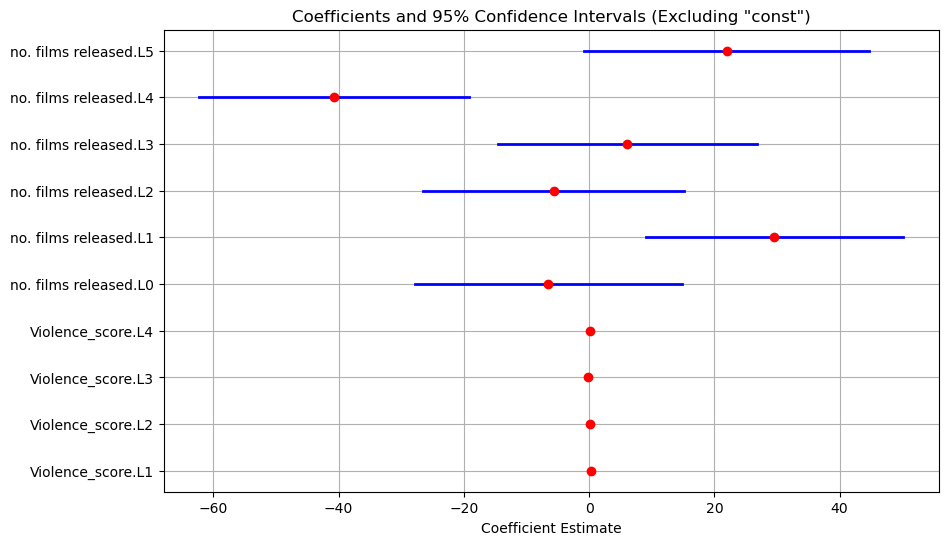

In [20]:
# Plot the 95% confidence intervals for all important coefficients
plot_coefficients_with_confidence_intervals(results_5_without_TFE_all_states)